In [8]:
# page4

from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
Y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, Y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(0.4, 0.8333333333333334, 'sepal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'sepal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

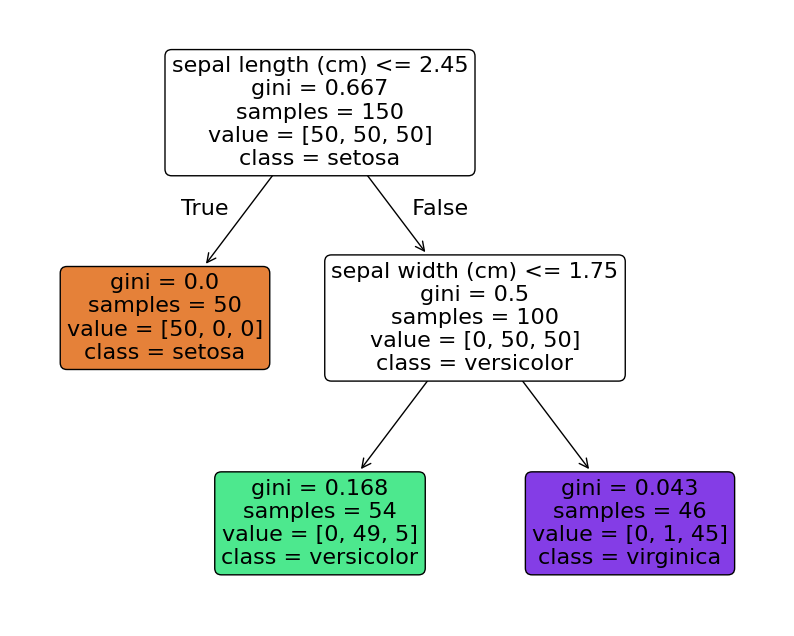

In [10]:
# page5

import matplotlib.pyplot as plt
from sklearn import tree

plt.figure( figsize=(10,8) )
tree.plot_tree(tree_clf,
               class_names=iris.target_names,
               feature_names=iris.feature_names,
               impurity=True, filled=True,
               rounded=True)

In [11]:
# page10

print("gini of G4=", 1-((0/54)**2 + (49/54)**2 + (5/54)**2))
print("gini of G1=", 1-((50/50)**2 + (0/50)**2 + (0/50)**2))

gini of G4= 0.16803840877914955
gini of G1= 0.0


[Text(0.375, 0.875, 'sepal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'sepal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'sepal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.75, 0.375, 'sepal length (cm) <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]\nclass = virginica')]

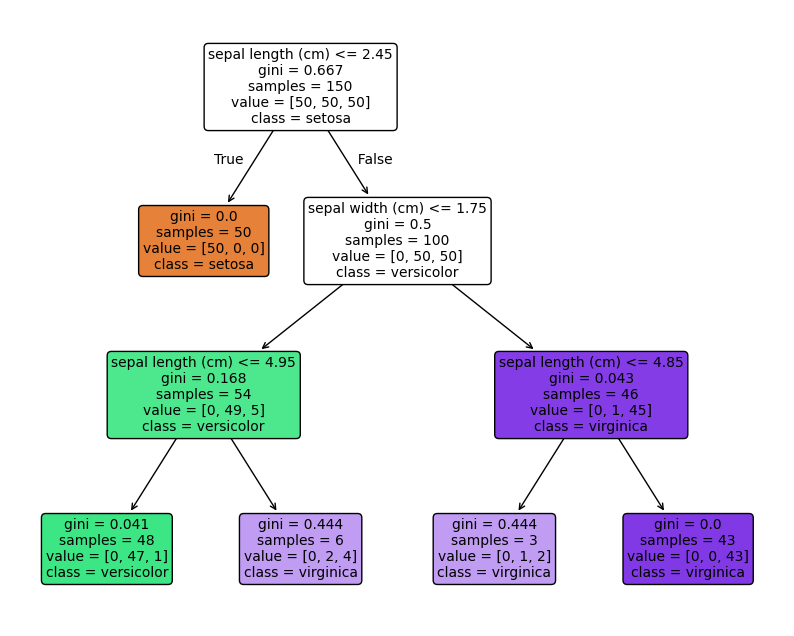

In [13]:
# page13

tree_clf_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_3.fit(X_iris, Y_iris)

plt.figure( figsize=(10,8) )
tree.plot_tree(tree_clf_3,
               class_names=iris.target_names,
               feature_names=iris.feature_names,
               impurity=True, filled=True,
               rounded=True)

In [24]:
# page12 - gemini 도움을 받았습니다

import numpy as np
import plotly.graph_objects as go


# *** 중요: X_iris를 DataFrame 형태로 유지합니다. .values를 붙이지 마세요! ***
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]]
Y_iris = iris.target


# 3. 결정 경계 플롯을 위한 메시그리드 생성
x_min, x_max = X_iris["petal length (cm)"].min() - 0.5, X_iris["petal length (cm)"].max() + 0.5
y_min, y_max = X_iris["petal width (cm)"].min() - 0.5, X_iris["petal width (cm)"].max() + 0.5

# 촘촘한 그리드를 만들기 위한 간격 설정
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 그리드 포인트에 대한 예측 수행
# predict 함수는 2D 배열을 기대하므로 flatten 후 stack
Z = tree_clf_3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 4. Plotly 그래프 생성
fig = go.Figure()

# 결정 영역 (Contour plot) 추가
fig.add_trace(go.Contour(
    x=xx[0],
    y=yy[:, 0],
    z=Z,
    showscale=False, # 컬러바 숨기기
    colorscale='Viridis', # 색상 스케일 설정 (자유롭게 변경 가능)
    opacity=0.4, # 투명도 조절
    hoverinfo='skip' # 호버 정보 숨기기
))

marker_symbols = ['circle', 'square', 'triangle-up']

# 원본 데이터 포인트 추가
for i, target_name in enumerate(iris.target_names):
    fig.add_trace(go.Scatter(
        x=X_iris["petal length (cm)"][Y_iris == i],
        y=X_iris["petal width (cm)"][Y_iris == i],
        mode='markers',
        marker=dict(
            size=8,
            opacity=0.8,
            symbol=marker_symbols[i] # 여기에 클래스별 다른 심볼 적용!
        ),
        name=target_name # 범례에 표시될 이름
    ))

# 레이아웃 설정
fig.update_layout(
    title='Decision Boundary of Decision Tree Classifier (max_depth=3)',
    xaxis_title='Petal Length (cm)',
    yaxis_title='Petal Width (cm)',
    legend_title='Species',
    hovermode='closest' # 호버 모드 설정
)

# 그래프 표시
fig.update_layout(width=800,height=600)
fig.show()


In [26]:
# page15

print("predict_proba()=", tree_clf.predict_proba([[5,1.5]]).round(3))
print("predict()=", tree_clf.predict([[5,1.5]]).round(3))

predict_proba()= [[0.    0.907 0.093]]
predict()= [1]


In [27]:
# page16

print("predict_proba()=", tree_clf_3.predict_proba([[5,1.5]]).round(3))
print("predict()=", tree_clf_3.predict([[5,1.5]]).round(3))

predict_proba()= [[0.    0.333 0.667]]
predict()= [2]


In [28]:
# page23

from sklearn.datasets import make_moons

X_moons, Y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf_m1 = DecisionTreeClassifier(random_state=42)
tree_clf_m2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf_m1.fit(X_moons, Y_moons)
tree_clf_m2.fit(X_moons, Y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [33]:
# page24

from plotly.subplots import make_subplots

# 결정 경계 플롯을 위한 메시그리드 생성 (공통 사용 가능)
x_min, x_max = X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5
y_min, y_max = X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z_m1 = tree_clf_m1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_m2 = tree_clf_m2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plotly Subplots 생성 (1행, 2열)
fig = make_subplots(rows=1, cols=2,
                     subplot_titles=('tree_clf_m1 (Default)',
                                     'tree_clf_m2 (min_samples_leaf=5)'))

# 결정 영역 (Contour plot) - 첫 번째 서브플롯
fig.add_trace(go.Contour(
    x=xx[0],     # *** 수정된 부분 ***
    y=yy[:, 0],  # *** 수정된 부분 ***
    z=Z_m1,
    showscale=False,
    colorscale=['lightpink', 'lightblue'], # 두 클래스에 맞는 색상 (조정 가능)
    opacity=0.4,
    hoverinfo='skip'
), row=1, col=1)

# 결정 영역 (Contour plot) - 두 번째 서브플롯
fig.add_trace(go.Contour(
    x=xx[0],     # *** 수정된 부분 ***
    y=yy[:, 0],  # *** 수정된 부분 ***
    z=Z_m2,
    showscale=False,
    colorscale=['lightpink', 'lightblue'], # 두 클래스에 맞는 색상 (조정 가능)
    opacity=0.4,
    hoverinfo='skip'
), row=1, col=2)

# 원본 데이터 포인트 추가 (클래스별 마커 모양 다르게)
# 클래스 0: 원 (circle), 클래스 1: 위쪽 삼각형 (triangle-up)
marker_symbols = ['circle', 'triangle-up']

for i in range(2):
    # 첫 번째 서브플롯
    fig.add_trace(go.Scatter(
        x=X_moons[(Y_moons == i), 0],
        y=X_moons[(Y_moons == i), 1],
        mode='markers',
        marker=dict(
            size=8,
            opacity=0.8,
            symbol=marker_symbols[i]
        ),
        name=f'Class {i}' if i == 0 else '', # 첫 번째 플롯에만 범례 표시
        showlegend=True if i == 0 else False
    ), row=1, col=1)

    # 두 번째 서브플롯
    fig.add_trace(go.Scatter(
        x=X_moons[(Y_moons == i), 0],
        y=X_moons[(Y_moons == i), 1],
        mode='markers',
        marker=dict(
            size=8,
            opacity=0.8,
            symbol=marker_symbols[i]
        ),
        name=f'Class {i}' if i == 0 else '',
        showlegend=False # 두 번째 플롯에는 범례 중복 표시 방지
    ), row=1, col=2)

# 레이아웃 업데이트
fig.update_layout(
    title_text='Decision Boundaries of Two Decision Tree Classifiers',
    hovermode='closest'
)

fig.update_xaxes(title_text="Feature 0", row=1, col=1)
fig.update_yaxes(title_text="Feature 1", row=1, col=1)
fig.update_xaxes(title_text="Feature 0", row=1, col=2)
fig.update_yaxes(title_text="Feature 1", row=1, col=2)

# 그래프 표시
fig.update_layout(width=1400,height=600)
fig.show()

[Text(0.4, 0.8333333333333334, 'sepal length (cm) <= 2.45\nsquared_error = 0.667\nsamples = 150\nvalue = 1.0'),
 Text(0.2, 0.5, 'squared_error = 0.0\nsamples = 50\nvalue = 0.0'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'sepal width (cm) <= 1.75\nsquared_error = 0.25\nsamples = 100\nvalue = 1.5'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.084\nsamples = 54\nvalue = 1.093'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.021\nsamples = 46\nvalue = 1.978')]

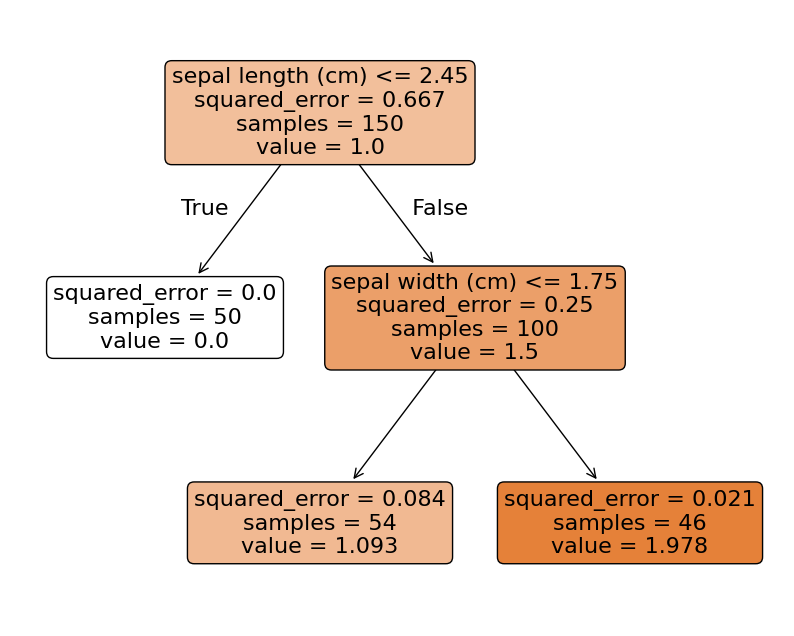

In [39]:
# page26
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_iris, Y_iris)

plt.figure( figsize=(10,8) )
tree.plot_tree(tree_reg,
               class_names=iris.target_names,
               feature_names=iris.feature_names,
               impurity=True, filled=True,
               rounded=True)

In [50]:
# page31
import numpy as np
import plotly.graph_objects as go
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# 1. 아이리스 데이터셋 로드
iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]] # 원본 특성
Y_iris = iris.target

# 2. PCA 파이프라인 생성 및 데이터 변환
pca_pipeline = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=42)) # 2개의 주성분으로 축소
X_iris_rotated = pca_pipeline.fit_transform(X_iris) # X_iris_rotated는 이제 NumPy 배열

# 3. 결정 트리 모델 학습 (PCA 변환된 X_iris_rotated에 대해 학습)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, Y_iris) # <-- 여기를 X_iris_rotated로 수정!

# 4. 결정 경계 플롯을 위한 메시그리드 생성
# X_iris_rotated의 범위에 맞춰 메시그리드 생성 (PCA 공간)
x_min, x_max = X_iris_rotated[:, 0].min() - 0.5, X_iris_rotated[:, 0].max() + 0.5
y_min, y_max = X_iris_rotated[:, 1].min() - 0.5, X_iris_rotated[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 학습된 tree_clf_pca 모델로 메시그리드에 대한 예측 수행
# np.c_는 (n_samples, 2) 형태의 배열을 만듭니다.
Z = tree_clf_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5. Plotly 그래프 생성
fig = go.Figure()

# 결정 영역 (Contour plot) 추가
fig.add_trace(go.Contour(
    x=xx[0],
    y=yy[:, 0],
    z=Z,
    showscale=False,
    colorscale='Viridis', # 색상 스케일 설정
    opacity=0.4,
    hoverinfo='skip'
))

# 원본 데이터 포인트 추가 (클래스별 마커 모양 다르게)
marker_symbols = ['circle', 'square', 'diamond'] # Iris 세 종류에 맞춰 원, 사각형, 다이아몬드

for i, target_name in enumerate(iris.target_names):
    fig.add_trace(go.Scatter(
        x=X_iris_rotated[Y_iris == i, 0], # <-- X_iris_rotated의 첫 번째 주성분
        y=X_iris_rotated[Y_iris == i, 1], # <-- X_iris_rotated의 두 번째 주성분
        mode='markers',
        marker=dict(
            size=8,
            opacity=0.8,
            symbol=marker_symbols[i]
        ),
        name=target_name
    ))

# 6. 레이아웃 설정
fig.update_layout(
    title='Decision Boundary of Decision Tree (max_depth=2) on PCA Transformed Iris Data',
    xaxis_title='Principal Component 1', # <-- 축 이름 변경
    yaxis_title='Principal Component 2', # <-- 축 이름 변경
    legend_title='Species',
    hovermode='closest'
)

# 그래프 표시
fig.update_layout(width=800,height=600)
fig.show()

In [55]:
# page53

from plotly.subplots import make_subplots
from sklearn.ensemble import BaggingClassifier

X_moons, Y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf_org = DecisionTreeClassifier(random_state=42)
tree_clf_bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, random_state=42)
tree_clf_org.fit(X_moons, Y_moons)
tree_clf_bag.fit(X_moons, Y_moons)



# 결정 경계 플롯을 위한 메시그리드 생성 (공통 사용 가능)
x_min, x_max = X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5
y_min, y_max = X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z_m1 = tree_clf_org.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_m2 = tree_clf_bag.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plotly Subplots 생성 (1행, 2열)
fig = make_subplots(rows=1, cols=2,
                     subplot_titles=('tree_clf_org',
                                     'tree_clf_bag'))

# 결정 영역 (Contour plot) - 첫 번째 서브플롯
fig.add_trace(go.Contour(
    x=xx[0],     # *** 수정된 부분 ***
    y=yy[:, 0],  # *** 수정된 부분 ***
    z=Z_m1,
    showscale=False,
    colorscale=['lightpink', 'lightblue'], # 두 클래스에 맞는 색상 (조정 가능)
    opacity=0.4,
    hoverinfo='skip'
), row=1, col=1)

# 결정 영역 (Contour plot) - 두 번째 서브플롯
fig.add_trace(go.Contour(
    x=xx[0],     # *** 수정된 부분 ***
    y=yy[:, 0],  # *** 수정된 부분 ***
    z=Z_m2,
    showscale=False,
    colorscale=['lightpink', 'lightblue'], # 두 클래스에 맞는 색상 (조정 가능)
    opacity=0.4,
    hoverinfo='skip'
), row=1, col=2)

# 원본 데이터 포인트 추가 (클래스별 마커 모양 다르게)
# 클래스 0: 원 (circle), 클래스 1: 위쪽 삼각형 (triangle-up)
marker_symbols = ['circle', 'triangle-up']

for i in range(2):
    # 첫 번째 서브플롯
    fig.add_trace(go.Scatter(
        x=X_moons[(Y_moons == i), 0],
        y=X_moons[(Y_moons == i), 1],
        mode='markers',
        marker=dict(
            size=8,
            opacity=0.8,
            symbol=marker_symbols[i]
        ),
        name=f'Class {i}' if i == 0 else '', # 첫 번째 플롯에만 범례 표시
        showlegend=True if i == 0 else False
    ), row=1, col=1)

    # 두 번째 서브플롯
    fig.add_trace(go.Scatter(
        x=X_moons[(Y_moons == i), 0],
        y=X_moons[(Y_moons == i), 1],
        mode='markers',
        marker=dict(
            size=8,
            opacity=0.8,
            symbol=marker_symbols[i]
        ),
        name=f'Class {i}' if i == 0 else '',
        showlegend=False # 두 번째 플롯에는 범례 중복 표시 방지
    ), row=1, col=2)

# 레이아웃 업데이트
fig.update_layout(
    title_text='Decision Boundaries of Two Decision Tree Classifiers',
    hovermode='closest'
)

fig.update_xaxes(title_text="Feature 0", row=1, col=1)
fig.update_yaxes(title_text="Feature 1", row=1, col=1)
fig.update_xaxes(title_text="Feature 0", row=1, col=2)
fig.update_yaxes(title_text="Feature 1", row=1, col=2)

# 그래프 표시
fig.update_layout(width=1400,height=600)
fig.show()

In [58]:
# page56

from plotly.subplots import make_subplots
from sklearn.ensemble import BaggingClassifier

X_moons, Y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf_bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, random_state=42)
tree_clf_oob = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, oob_score=True, random_state=42)
tree_clf_bag.fit(X_moons, Y_moons)
tree_clf_oob.fit(X_moons, Y_moons)



# 결정 경계 플롯을 위한 메시그리드 생성 (공통 사용 가능)
x_min, x_max = X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5
y_min, y_max = X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z_m1 = tree_clf_bag.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_m2 = tree_clf_oob.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plotly Subplots 생성 (1행, 2열)
fig = make_subplots(rows=1, cols=2,
                     subplot_titles=('tree_clf_bag',
                                     'tree_clf_oob'))

# 결정 영역 (Contour plot) - 첫 번째 서브플롯
fig.add_trace(go.Contour(
    x=xx[0],     # *** 수정된 부분 ***
    y=yy[:, 0],  # *** 수정된 부분 ***
    z=Z_m1,
    showscale=False,
    colorscale=['lightpink', 'lightblue'], # 두 클래스에 맞는 색상 (조정 가능)
    opacity=0.4,
    hoverinfo='skip'
), row=1, col=1)

# 결정 영역 (Contour plot) - 두 번째 서브플롯
fig.add_trace(go.Contour(
    x=xx[0],     # *** 수정된 부분 ***
    y=yy[:, 0],  # *** 수정된 부분 ***
    z=Z_m2,
    showscale=False,
    colorscale=['lightpink', 'lightblue'], # 두 클래스에 맞는 색상 (조정 가능)
    opacity=0.4,
    hoverinfo='skip'
), row=1, col=2)

# 원본 데이터 포인트 추가 (클래스별 마커 모양 다르게)
# 클래스 0: 원 (circle), 클래스 1: 위쪽 삼각형 (triangle-up)
marker_symbols = ['circle', 'triangle-up']

for i in range(2):
    # 첫 번째 서브플롯
    fig.add_trace(go.Scatter(
        x=X_moons[(Y_moons == i), 0],
        y=X_moons[(Y_moons == i), 1],
        mode='markers',
        marker=dict(
            size=8,
            opacity=0.8,
            symbol=marker_symbols[i]
        ),
        name=f'Class {i}' if i == 0 else '', # 첫 번째 플롯에만 범례 표시
        showlegend=True if i == 0 else False
    ), row=1, col=1)

    # 두 번째 서브플롯
    fig.add_trace(go.Scatter(
        x=X_moons[(Y_moons == i), 0],
        y=X_moons[(Y_moons == i), 1],
        mode='markers',
        marker=dict(
            size=8,
            opacity=0.8,
            symbol=marker_symbols[i]
        ),
        name=f'Class {i}' if i == 0 else '',
        showlegend=False # 두 번째 플롯에는 범례 중복 표시 방지
    ), row=1, col=2)

# 레이아웃 업데이트
fig.update_layout(
    title_text='Decision Boundaries of Two BaggingClassifier',
    hovermode='closest'
)

fig.update_xaxes(title_text="Feature 0", row=1, col=1)
fig.update_yaxes(title_text="Feature 1", row=1, col=1)
fig.update_xaxes(title_text="Feature 0", row=1, col=2)
fig.update_yaxes(title_text="Feature 1", row=1, col=2)

# 그래프 표시
fig.update_layout(width=1400,height=600)
fig.show()

In [60]:
# page62

from plotly.subplots import make_subplots
from sklearn.ensemble import BaggingClassifier

X_moons, Y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_bag_org = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=0.75, bootstrap=True, max_features=1.0, bootstrap_features=False, random_state=42)
tree_bag_subs = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=1.0, bootstrap=False, max_features=0.5, bootstrap_features=True, random_state=42)
tree_bag_patch = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=0.75, bootstrap=True, max_features=0.5, bootstrap_features=True, random_state=42)
tree_bag_org.fit(X_moons, Y_moons)
tree_bag_subs.fit(X_moons, Y_moons)
tree_bag_patch.fit(X_moons, Y_moons)



# 결정 경계 플롯을 위한 메시그리드 생성 (공통 사용 가능)
x_min, x_max = X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5
y_min, y_max = X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z_m1 = tree_bag_org.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_m2 = tree_bag_subs.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_m3 = tree_bag_patch.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plotly Subplots 생성 (1행, 2열)
fig = make_subplots(rows=1, cols=3,
                     subplot_titles=('Baggign ORG',
                                     'Random Subspaces',
                                     'Random Patches'))

# 결정 영역 (Contour plot) - 첫 번째 서브플롯
fig.add_trace(go.Contour(
    x=xx[0],     # *** 수정된 부분 ***
    y=yy[:, 0],  # *** 수정된 부분 ***
    z=Z_m1,
    showscale=False,
    colorscale=['lightpink', 'lightblue'], # 두 클래스에 맞는 색상 (조정 가능)
    opacity=0.4,
    hoverinfo='skip'
), row=1, col=1)

# 결정 영역 (Contour plot) - 두 번째 서브플롯
fig.add_trace(go.Contour(
    x=xx[0],     # *** 수정된 부분 ***
    y=yy[:, 0],  # *** 수정된 부분 ***
    z=Z_m2,
    showscale=False,
    colorscale=['lightpink', 'lightblue'], # 두 클래스에 맞는 색상 (조정 가능)
    opacity=0.4,
    hoverinfo='skip'
), row=1, col=2)

# 결정 영역 (Contour plot) - 두 번째 서브플롯
fig.add_trace(go.Contour(
    x=xx[0],     # *** 수정된 부분 ***
    y=yy[:, 0],  # *** 수정된 부분 ***
    z=Z_m3,
    showscale=False,
    colorscale=['lightpink', 'lightblue'], # 두 클래스에 맞는 색상 (조정 가능)
    opacity=0.4,
    hoverinfo='skip'
), row=1, col=3)

# 원본 데이터 포인트 추가 (클래스별 마커 모양 다르게)
# 클래스 0: 원 (circle), 클래스 1: 위쪽 삼각형 (triangle-up)
marker_symbols = ['circle', 'triangle-up']

for i in range(2):
    # 첫 번째 서브플롯
    fig.add_trace(go.Scatter(
        x=X_moons[(Y_moons == i), 0],
        y=X_moons[(Y_moons == i), 1],
        mode='markers',
        marker=dict(
            size=8,
            opacity=0.8,
            symbol=marker_symbols[i]
        ),
        name=f'Class {i}' if i == 0 else '', # 첫 번째 플롯에만 범례 표시
        showlegend=True if i == 0 else False
    ), row=1, col=1)

    # 두 번째 서브플롯
    fig.add_trace(go.Scatter(
        x=X_moons[(Y_moons == i), 0],
        y=X_moons[(Y_moons == i), 1],
        mode='markers',
        marker=dict(
            size=8,
            opacity=0.8,
            symbol=marker_symbols[i]
        ),
        name=f'Class {i}' if i == 0 else '',
        showlegend=False # 두 번째 플롯에는 범례 중복 표시 방지
    ), row=1, col=2)

    # 세 번째 서브플롯
    fig.add_trace(go.Scatter(
        x=X_moons[(Y_moons == i), 0],
        y=X_moons[(Y_moons == i), 1],
        mode='markers',
        marker=dict(
            size=8,
            opacity=0.8,
            symbol=marker_symbols[i]
        ),
        name=f'Class {i}' if i == 0 else '',
        showlegend=False # 세 번째 플롯에는 범례 중복 표시 방지
    ), row=1, col=3)

# 레이아웃 업데이트
fig.update_layout(
    title_text='Three Type of BaggingClassifier',
    hovermode='closest'
)

fig.update_xaxes(title_text="Feature 0", row=1, col=1)
fig.update_yaxes(title_text="Feature 1", row=1, col=1)
fig.update_xaxes(title_text="Feature 0", row=1, col=2)
fig.update_yaxes(title_text="Feature 1", row=1, col=2)
fig.update_xaxes(title_text="Feature 0", row=1, col=3)
fig.update_yaxes(title_text="Feature 1", row=1, col=3)

# 그래프 표시
fig.update_layout(width=1400,height=600)
fig.show()

In [64]:
# page64

from plotly.subplots import make_subplots
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

X_moons, Y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf_bag = BaggingClassifier(DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16), n_estimators=500, n_jobs=-1, random_state=42)
tree_clf_ran = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
tree_clf_bag.fit(X_moons, Y_moons)
tree_clf_ran.fit(X_moons, Y_moons)



# 결정 경계 플롯을 위한 메시그리드 생성 (공통 사용 가능)
x_min, x_max = X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5
y_min, y_max = X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z_m1 = tree_clf_bag.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_m2 = tree_clf_ran.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plotly Subplots 생성 (1행, 2열)
fig = make_subplots(rows=1, cols=2,
                     subplot_titles=('Bagging Org',
                                     'Random Forest'))

# 결정 영역 (Contour plot) - 첫 번째 서브플롯
fig.add_trace(go.Contour(
    x=xx[0],     # *** 수정된 부분 ***
    y=yy[:, 0],  # *** 수정된 부분 ***
    z=Z_m1,
    showscale=False,
    colorscale=['lightpink', 'lightblue'], # 두 클래스에 맞는 색상 (조정 가능)
    opacity=0.4,
    hoverinfo='skip'
), row=1, col=1)

# 결정 영역 (Contour plot) - 두 번째 서브플롯
fig.add_trace(go.Contour(
    x=xx[0],     # *** 수정된 부분 ***
    y=yy[:, 0],  # *** 수정된 부분 ***
    z=Z_m2,
    showscale=False,
    colorscale=['lightpink', 'lightblue'], # 두 클래스에 맞는 색상 (조정 가능)
    opacity=0.4,
    hoverinfo='skip'
), row=1, col=2)

# 원본 데이터 포인트 추가 (클래스별 마커 모양 다르게)
# 클래스 0: 원 (circle), 클래스 1: 위쪽 삼각형 (triangle-up)
marker_symbols = ['circle', 'triangle-up']

for i in range(2):
    # 첫 번째 서브플롯
    fig.add_trace(go.Scatter(
        x=X_moons[(Y_moons == i), 0],
        y=X_moons[(Y_moons == i), 1],
        mode='markers',
        marker=dict(
            size=8,
            opacity=0.8,
            symbol=marker_symbols[i]
        ),
        name=f'Class {i}' if i == 0 else '', # 첫 번째 플롯에만 범례 표시
        showlegend=True if i == 0 else False
    ), row=1, col=1)

    # 두 번째 서브플롯
    fig.add_trace(go.Scatter(
        x=X_moons[(Y_moons == i), 0],
        y=X_moons[(Y_moons == i), 1],
        mode='markers',
        marker=dict(
            size=8,
            opacity=0.8,
            symbol=marker_symbols[i]
        ),
        name=f'Class {i}' if i == 0 else '',
        showlegend=False # 두 번째 플롯에는 범례 중복 표시 방지
    ), row=1, col=2)

# 레이아웃 업데이트
fig.update_layout(
    title_text='Bagging Org vs Random Forest',
    hovermode='closest'
)

fig.update_xaxes(title_text="Feature 0", row=1, col=1)
fig.update_yaxes(title_text="Feature 1", row=1, col=1)
fig.update_xaxes(title_text="Feature 0", row=1, col=2)
fig.update_yaxes(title_text="Feature 1", row=1, col=2)

# 그래프 표시
fig.update_layout(width=1400,height=600)
fig.show()